In [181]:
import pandas as pd
import pymysql
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statistics as st
from scipy import stats
import sqlalchemy as db
import mysql.connector
from scipy.stats import mode, skew, f_oneway

In [4]:
con = mysql.connector.connect(
    host='localhost',
    user='root',
    passwd='masbaban737'
)

In [5]:
con

In [6]:
c = con.cursor()
q = 'USE world'
c.execute(q)

In [10]:
c = con.cursor()
city = 'SELECT * FROM city'
c.execute(city)
res = c.fetchall()
city = pd.DataFrame(res, columns=c.column_names)

In [8]:
c = con.cursor()
country = 'SELECT * FROM country'
c.execute(country)
res = c.fetchall()
country = pd.DataFrame(res, columns=c.column_names)

In [9]:
c = con.cursor()
cl = 'SELECT * FROM countrylanguage'
c.execute(cl)
res = c.fetchall()
countrylanguage = pd.DataFrame(res, columns=c.column_names)

## no.1.1

In [12]:
country.sort_values('Population').head(10)[['Name','Continent','Region','IndepYear','Population']]

,Name,Continent,Region,IndepYear,Population
34,Bouvet Island,Antarctica,Antarctica,NaN,0
100,British Indian Ocean Territory,Africa,Eastern Africa,NaN,0
187,South Georgia and the South Sandwich Islands,Antarctica,Antarctica,NaN,0
11,Antarctica,Antarctica,Antarctica,NaN,0
12,French Southern territories,Antarctica,Antarctica,NaN,0
221,United States Minor Outlying Islands,Oceania,Micronesia/Caribbean,NaN,0
93,Heard Island and McDonald Islands,Antarctica,Antarctica,NaN,0
166,Pitcairn,Oceania,Polynesia,NaN,50
38,Cocos (Keeling) Islands,Oceania,Australia and New Zealand,NaN,600
225,Holy See (Vatican City State),Europe,Southern Europe,1929.0,1000


## no.1.2

In [13]:
city.groupby('CountryCode').describe()['Population'][['mean']].sort_values('mean',ascending=False).head(10)

,mean
CountryCode,
SGP,4017733.0
HKG,1650316.5
URY,1236000.0
GIN,1090610.0
UGA,890800.0
SLE,850000.0
LBR,850000.0
MLI,809552.0
AUS,808119.0


## no.1.3

In [14]:
countrylanguage.groupby('Language').describe()['Percentage'][['count']].sort_values('count',ascending=False).head(10)

,count
Language,
English,60
Arabic,33
Spanish,28
French,25
Chinese,19
German,19
Russian,17
Italian,15
Creole English,14


In [31]:
benua = country.groupby('Continent').sum()[['Population']]
benua.rename(columns={'Continent' : 'Benua'}, inplace=True)
benua.reset_index(inplace=True)
benua

,Continent,Population
0,Africa,784475000
1,Antarctica,0
2,Asia,3705025700
3,Europe,730074600
4,North America,482993000
5,Oceania,30401150
6,South America,345780000


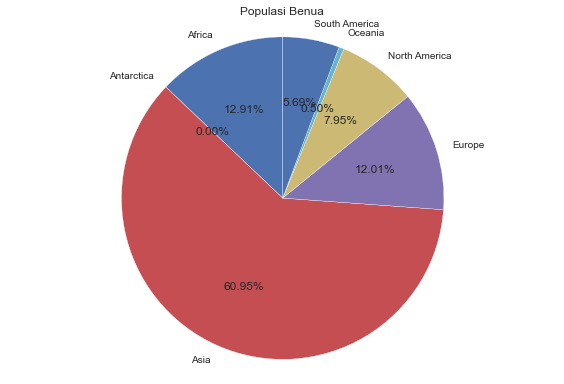

In [52]:
data = list(continent['Population'])
labels = list(continent['Population'].index)
plt.pie(data, labels= labels,
        startangle=90, autopct=lambda p:f'{p:.2f}%')

plt.title("Populasi Benua")
plt.tight_layout()
plt.axis('equal')
plt.show()

# JAWABAN #
 2.1 Berdasarkan piechart diatas, benua asia yang paling besar presentasenya dengan nilai =  60.95%
 
 2.2 sementara presentase benua amerika utara adalah 7,95%

# no. 3

In [34]:
country.head(5)

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
0,ABW,Aruba,North America,Caribbean,193.00,NaN,103000,78.4,828.00,793.00,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.00,1919.0,22720000,45.9,5976.00,None,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
2,AGO,Angola,Africa,Central Africa,1246700.00,1975.0,12878000,38.3,6648.00,7984.00,Angola,Republic,José Eduardo dos Santos,56.0,AO
3,AIA,Anguilla,North America,Caribbean,96.00,NaN,8000,76.1,63.20,None,Anguilla,Dependent Territory of the UK,Elisabeth II,62.0,AI
4,ALB,Albania,Europe,Southern Europe,28748.00,1912.0,3401200,71.6,3205.00,2500.00,Shqipëria,Republic,Rexhep Mejdani,34.0,AL


In [55]:
country[country['Continent']=='Asia'].sort_values('Population',ascending=False)[['Name','Population']].head(10)

,Name,Population
41,China,1277558000
99,India,1013662000
98,Indonesia,212107000
164,Pakistan,156483000
21,Bangladesh,129155000
109,Japan,126714000
230,Vietnam,79832000
168,Philippines,75967000
102,Iran,67702000
215,Turkey,66591000


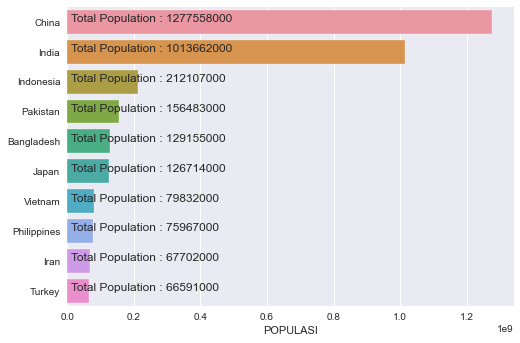

In [57]:
sns.set(style="whitegrid")
plt.style.use('seaborn')
fig, ax = plt.subplots()
y = list(country[country['Continent']=='Asia'].sort_values('Population',ascending=False)['Name'].head(10))
y_pos = np.arange(len(y))
x = list(country[country['Continent']=='Asia'].sort_values('Population',ascending=False)['Population'].head(10))
ax = sns.barplot(x=x, y=y)
ax.set_yticklabels(y)
ax.set_xlabel('POPULASI')
for a in y_pos :
    plt.text(10000000,a,f'Total Population : {x[a]}')
plt.show()

# JAWABAN 
3.2 negara dengan populasi terbanyak adlah china dengan jumlah penduduk 1.277.558.000

3.3 negara dengan populasi paling sedikit adalah turkey dengan jumlah penduduk 66.591.000

3.4 negara di urutan ke-3 adalah indonesia dengan jumlah penduduk 212.107.000

# no.4

In [68]:
df_life = country[country['Continent']=='Asia']['LifeExpectancy']
df_life

1      45.9
7      74.1
9      66.4
16     62.9
21     60.2
23     73.0
32     73.6
33     52.4
41     71.4
54     76.7
77     64.5
92     79.5
98     68.0
99     62.5
102    69.7
103    66.5
105    78.6
108    77.4
109    80.7
110    63.2
112    63.4
113    56.5
116    74.4
117    76.1
118    53.1
119    71.3
124    71.8
129    81.6
134    62.2
140    54.9
141    67.3
149    70.8
160    57.8
163    71.8
164    61.1
168    67.5
173    70.7
176    71.4
178    72.4
183    67.8
186    80.1
203    68.5
207    68.6
208    64.1
210    60.9
211    46.0
215    71.0
217    76.4
224    63.7
230    69.3
234    59.8
Name: LifeExpectancy, dtype: object

In [76]:
df_life = df_life.astype(float)
df_life.describe()

count    51.000000
mean     67.441176
std       8.396527
min      45.900000
25%      62.700000
50%      68.500000
75%      72.700000
max      81.600000
Name: LifeExpectancy, dtype: float64

In [77]:
df_life.head(5)

1     45.9
7     74.1
9     66.4
16    62.9
21    60.2
Name: LifeExpectancy, dtype: float64

In [79]:
q3 = np.quantile(df_life, .75)
q1 = np.quantile(df_life, .25)
iqr = q3 - q1
print(f'IQR Benua Asia = {iqr}')

IQR Benua Asia = 10.0


In [86]:
mean = np.mean(df_life)
median = np.median(df_life)
std = st.stdev(df_life)
upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr
skew, p_value = stats.skewtest(df_life)
print(f'mean               = {mean}')
print(f'median             = {median}')
print(f'standart deviation = {std}')
print(f'upper whisker      = {upper}')
print(f'lower whisker      = {lower}')
print(f'skewness           = {skew}')

mean               = 67.44117647058825
median             = 68.5
standart deviation = 8.39652729336571
upper whisker      = 87.7
lower whisker      = 47.7
skewness           = -1.810788593529504


D:\ANACONDA\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


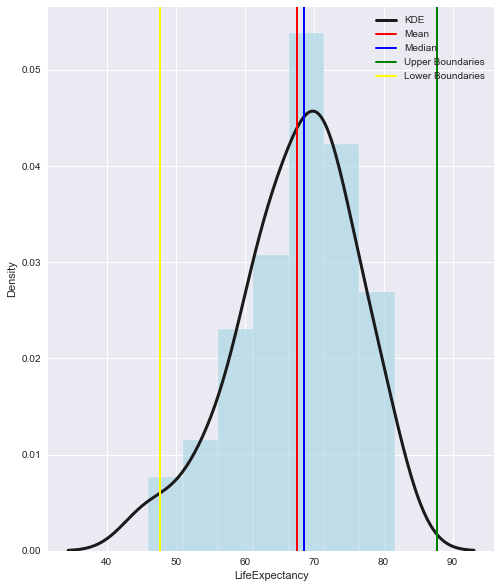

In [92]:
plt.figure(figsize=(8,10))
ax = sns.distplot(df_life, kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"alpha": 0.7, "color": "lightblue"})

plt.axvline(mean, color='red', label='Mean', linewidth=2)
plt.axvline(median, color='blue', label='Median', linewidth=2)
plt.axvline(upper, color='green', label='Upper Boundaries', linewidth=2)
plt.axvline(lower, color='yellow', label='Lower Boundaries', linewidth=2)
plt.legend()

plt.show()

In [91]:
Asia = country[country['Continent']=='Asia']
Asia[(Asia['LifeExpectancy']>upper) | (Asia['LifeExpectancy']<lower)]

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.00,1919.0,22720000,45.9,5976.00,None,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
211,TMP,East Timor,Asia,Southeast Asia,14874.00,NaN,885000,46.0,0.00,None,Timor Timur,Administrated by the UN,José Alexandre Gusmão,1522.0,TP


karena nilai upper whisker 87.7, sedangkan maksimal dari LifeExpectanct adalah 83.5

maka TIDAK ADA negara yang memiliki harapan hidup diatas outliers

# no.5

In [95]:
country['GNP'] = country['GNP']*1000000
df_life = df_life.astype(float)

country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Code            239 non-null    object 
 1   Name            239 non-null    object 
 2   Continent       239 non-null    object 
 3   Region          239 non-null    object 
 4   SurfaceArea     239 non-null    object 
 5   IndepYear       192 non-null    float64
 6   Population      239 non-null    int64  
 7   LifeExpectancy  222 non-null    object 
 8   GNP             239 non-null    object 
 9   GNPOld          178 non-null    object 
 10  LocalName       239 non-null    object 
 11  GovernmentForm  239 non-null    object 
 12  HeadOfState     238 non-null    object 
 13  Capital         232 non-null    float64
 14  Code2           239 non-null    object 
dtypes: float64(2), int64(1), object(12)
memory usage: 28.1+ KB


In [100]:
country['GNP'].describe()

count      239
unique     214
top       0.00
freq        24
Name: GNP, dtype: object

In [101]:
country['GNP'] = country['GNP'].astype(float)

In [103]:
country['GNP'].describe()

count    2.390000e+02
mean     1.228239e+23
std      6.379976e+23
min      0.000000e+00
25%      6.400000e+20
50%      4.787000e+21
75%      2.994450e+22
max      8.510700e+24
Name: GNP, dtype: float64

In [105]:
country.head(3)

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
0,ABW,Aruba,North America,Caribbean,193.00,NaN,103000,78.4,8.280000e+20,793.00,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.00,1919.0,22720000,45.9,5.976000e+21,None,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
2,AGO,Angola,Africa,Central Africa,1246700.00,1975.0,12878000,38.3,6.648000e+21,7984.00,Angola,Republic,José Eduardo dos Santos,56.0,AO


In [107]:
def percapita(GNP, POP):
    return GNP / POP
GNP_Percapita = percapita(country['GNP'], country['Population'])
country['GNPPerCapita'] = GNP_Percapita
country.head(5)

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2,GNPPerCapita
0,ABW,Aruba,North America,Caribbean,193.00,NaN,103000,78.4,8.280000e+20,793.00,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW,8.038835e+15
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.00,1919.0,22720000,45.9,5.976000e+21,None,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF,2.630282e+14
2,AGO,Angola,Africa,Central Africa,1246700.00,1975.0,12878000,38.3,6.648000e+21,7984.00,Angola,Republic,José Eduardo dos Santos,56.0,AO,5.162292e+14
3,AIA,Anguilla,North America,Caribbean,96.00,NaN,8000,76.1,6.320000e+19,None,Anguilla,Dependent Territory of the UK,Elisabeth II,62.0,AI,7.900000e+15
4,ALB,Albania,Europe,Southern Europe,28748.00,1912.0,3401200,71.6,3.205000e+21,2500.00,Shqipëria,Republic,Rexhep Mejdani,34.0,AL,9.423145e+14


# no.6

In [116]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Code            239 non-null    object 
 1   Name            239 non-null    object 
 2   Continent       239 non-null    object 
 3   Region          239 non-null    object 
 4   SurfaceArea     239 non-null    object 
 5   IndepYear       192 non-null    float64
 6   Population      239 non-null    int64  
 7   LifeExpectancy  222 non-null    object 
 8   GNP             239 non-null    float64
 9   GNPOld          178 non-null    object 
 10  LocalName       239 non-null    object 
 11  GovernmentForm  239 non-null    object 
 12  HeadOfState     238 non-null    object 
 13  Capital         232 non-null    float64
 14  Code2           239 non-null    object 
 15  GNPPerCapita    232 non-null    float64
dtypes: float64(4), int64(1), object(11)
memory usage: 30.0+ KB


In [118]:
country['LifeExpectancy'] = country['LifeExpectancy'].astype(float)
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Code            239 non-null    object 
 1   Name            239 non-null    object 
 2   Continent       239 non-null    object 
 3   Region          239 non-null    object 
 4   SurfaceArea     239 non-null    object 
 5   IndepYear       192 non-null    float64
 6   Population      239 non-null    int64  
 7   LifeExpectancy  222 non-null    float64
 8   GNP             239 non-null    float64
 9   GNPOld          178 non-null    object 
 10  LocalName       239 non-null    object 
 11  GovernmentForm  239 non-null    object 
 12  HeadOfState     238 non-null    object 
 13  Capital         232 non-null    float64
 14  Code2           239 non-null    object 
 15  GNPPerCapita    232 non-null    float64
dtypes: float64(5), int64(1), object(10)
memory usage: 30.0+ KB


In [119]:
country['LifeExpectancy'].corr(country['GNPPerCapita'],method='spearman')

0.7451212078375073

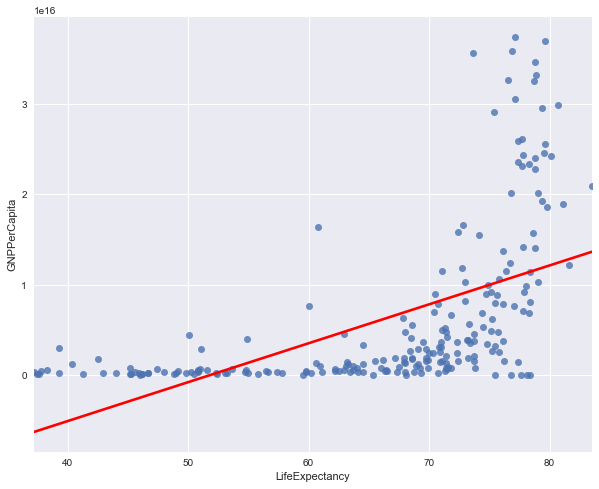

In [120]:
plt.figure(figsize=(10,8))
ax = sns.regplot(x="LifeExpectancy", y="GNPPerCapita", data=country, ci=None,
                 line_kws={'color':'red'})

Untuk soal nomor 6, saya setuju, karena bisa dilihat di angka korelasi dan char hubungan antara Population dan GNP per Capita, hubungan keduanya memiliki korelasi positif dan lumayan tinggi.

In [125]:
dfCountrymax = country['GNPPerCapita'].max()
dfCountrymax

3.745926095937572e+16

In [123]:
dfCountry1 = country.sort_values('GNPPerCapita', ascending = False)
dfCountrybest = country.head()

dfnegara = dfCountrybest.iloc[0]['Name']
dfbenua = dfCountrybest.iloc[0]['Continent']

print(f'Nama negara dengan GNP per Capita tertinggi: {dfnegara}')
print(f'Berada di Benua: {dfbenua}')

Nama negara dengan GNP per Capita tertinggi: Aruba
Berada di Benua: North America


# no.7

In [129]:
country.head(5)

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2,GNPPerCapita
0,ABW,Aruba,North America,Caribbean,193.00,NaN,103000,78.4,8.280000e+20,793.00,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW,8.038835e+15
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.00,1919.0,22720000,45.9,5.976000e+21,None,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF,2.630282e+14
2,AGO,Angola,Africa,Central Africa,1246700.00,1975.0,12878000,38.3,6.648000e+21,7984.00,Angola,Republic,José Eduardo dos Santos,56.0,AO,5.162292e+14
3,AIA,Anguilla,North America,Caribbean,96.00,NaN,8000,76.1,6.320000e+19,None,Anguilla,Dependent Territory of the UK,Elisabeth II,62.0,AI,7.900000e+15
4,ALB,Albania,Europe,Southern Europe,28748.00,1912.0,3401200,71.6,3.205000e+21,2500.00,Shqipëria,Republic,Rexhep Mejdani,34.0,AL,9.423145e+14


In [159]:
europe = country[country['Continent']=='Europe']
europe.head(5)

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2,GNPPerCapita
4,ALB,Albania,Europe,Southern Europe,28748.00,1912.0,3401200,71.6,3.205000e+21,2500.00,Shqipëria,Republic,Rexhep Mejdani,34.0,AL,9.423145e+14
5,AND,Andorra,Europe,Southern Europe,468.00,1278.0,78000,83.5,1.630000e+21,None,Andorra,Parliamentary Coprincipality,,55.0,AD,2.089744e+16
15,AUT,Austria,Europe,Western Europe,83859.00,1918.0,8091800,77.7,2.118600e+23,206025.00,Österreich,Federal Republic,Thomas Klestil,1523.0,AT,2.618206e+16
18,BEL,Belgium,Europe,Western Europe,30518.00,1830.0,10239000,77.8,2.497040e+23,243948.00,België/Belgique,"Constitutional Monarchy, Federation",Albert II,179.0,BE,2.438754e+16
22,BGR,Bulgaria,Europe,Eastern Europe,110994.00,1908.0,8190900,70.9,1.217800e+22,10169.00,Balgarija,Republic,Petar Stojanov,539.0,BG,1.486772e+15


europe1 = europe.dropna().sort_values(['GNPOld', 'GNP'])
europe1.head(5)

In [184]:
europe1.sum()[['GNP']]
europe1.sum()[['GNPOld']]
europe1.sum()[['GNPPerCapita']]

GNPPerCapita    5.35304e+17
dtype: object

In [185]:
europe1.sum()[['GNPOld']]

GNPOld    9382001.00
dtype: object

In [186]:
europe1.sum()[['GNPPerCapita']]

GNPPerCapita    5.35304e+17
dtype: object

In [192]:
alpha = 0.05
fstats, pvalue = f_oneway(europe1[europe1['GNP'] == 'GNPOld']['GNPPerCapita'],
                    europe1[europe1['GNPPerCapita'] == 'GNP']['GNPOld'])
pvalue

nan